In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Read data

In [2]:
df_master = pd.read_csv('14-06-2022/master.csv')
df_master['branch'] = 'master'

df_new = pd.read_csv('14-06-2022/new-algorithm-d10us.csv')
df_new['branch'] = 'new-algorithm-d10us'

df = pd.concat([df_master, df_new], ignore_index = True)
df.sample(10)

,name,cpu_time_us,package_energy,core_energy,branch
943,Life - parallel iterators generation,191645,267641,34117,new-algorithm-d10us
754,Life - parallel bridge generation,5351588,4856407,608092,new-algorithm-d10us
241,FrogJump,966903,1679463,196554,master
697,NBody sequential,72347,319075,117624,new-algorithm-d10us
326,NBody parallel reduce,160003,231098,44416,master
795,NBody parallel iterator,44486,91716,15609,new-algorithm-d10us
990,MergeSort,19787132,17606466,2352448,new-algorithm-d10us
20,MergeSort,16234561,19773544,1710925,master
202,Life - sequential generation,66449,292160,4364,master
384,Life - parallel bridge generation,5348171,5223043,613249,master


## Remove outliers

In [3]:
q_low = df["cpu_time_us"].quantile(0.01)
q_hi  = df["cpu_time_us"].quantile(0.99)
df = df[(df["cpu_time_us"] < q_hi) & (df["cpu_time_us"] > q_low)]

q_low = df["package_energy"].quantile(0.01)
q_hi  = df["package_energy"].quantile(0.99)
df = df[(df["package_energy"] < q_hi) & (df["package_energy"] > q_low)]

q_low = df["core_energy"].quantile(0.01)
q_hi  = df["core_energy"].quantile(0.99)
df = df[(df["core_energy"] < q_hi) & (df["core_energy"] > q_low)]

df.sample(10)

,name,cpu_time_us,package_energy,core_energy,branch
171,FrogJump,949084,1501433,127023,master
631,FrogJump,1114112,2307849,270570,new-algorithm-d10us
221,FrogJump,934397,2956039,305602,master
756,NBody parallel reduce,168821,267122,45484,new-algorithm-d10us
740,MergeSort,19066327,18193075,1314767,new-algorithm-d10us
753,Life - parallel iterators generation,178080,254717,32591,new-algorithm-d10us
877,NBody sequential,72321,327650,21666,new-algorithm-d10us
980,MergeSort,19619600,17555076,1357916,new-algorithm-d10us
745,NBody parallel iterator,33599,87002,15822,new-algorithm-d10us
360,MergeSort,16721190,17464444,1197570,master


## Normalize data

In [4]:
def extract_means(input_df):
    means = {'name': [],
             'branch': [],
             'cpu_time_us': [],
             'core_energy': [],
             'package_energy': []}

    for algorithm in set(input_df['name']):
        algorithm_df = input_df[input_df['name'] == algorithm]
        means['name'].append(algorithm)
        means['branch'].append(algorithm_df['branch'].values[0])
        means['cpu_time_us'].append(algorithm_df['cpu_time_us'].mean())
        means['core_energy'].append(algorithm_df['core_energy'].mean())
        means['package_energy'].append(algorithm_df['package_energy'].mean())
    
    return means


master_dict = extract_means(df_master)
new_algorithm_dict = extract_means(df_new)
means = {'name': [], 
         'cpu_time_ratio': [],
         'core_energy_ratio': [],
         'package_energy_ratio': []}

for index, algorithm in enumerate(master_dict['name']):
    means['name'].append(algorithm)
    means['cpu_time_ratio'].append(master_dict['cpu_time_us'][index] / new_algorithm_dict['cpu_time_us'][index])
    means['core_energy_ratio'].append(master_dict['core_energy'][index] / new_algorithm_dict['core_energy'][index])
    means['package_energy_ratio'].append(master_dict['package_energy'][index] / new_algorithm_dict['package_energy'][index])

df_to_plot = pd.DataFrame(data=means)
df_to_plot = df_to_plot.sort_values('cpu_time_ratio', ascending = False)
display(df_to_plot)


,name,cpu_time_ratio,core_energy_ratio,package_energy_ratio
6,NBody parallel iterator,1.263844,0.985276,0.935696
8,Travelling Salesman Problem,1.255194,0.942473,0.974067
9,NBody parallel reduce,0.996735,0.970377,0.974965
0,Life - parallel bridge generation,0.984393,1.022166,1.022019
3,FrogJump,0.935320,0.724915,0.792499
7,QuickSort,0.889378,1.016067,0.926230
5,MergeSort,0.880423,0.778532,0.922796
2,Life - parallel iterators generation,0.855778,0.881462,0.877666
1,Life - sequential generation,0.408181,0.909678,0.671045
4,NBody sequential,0.389056,0.996835,0.677034


## CPU time

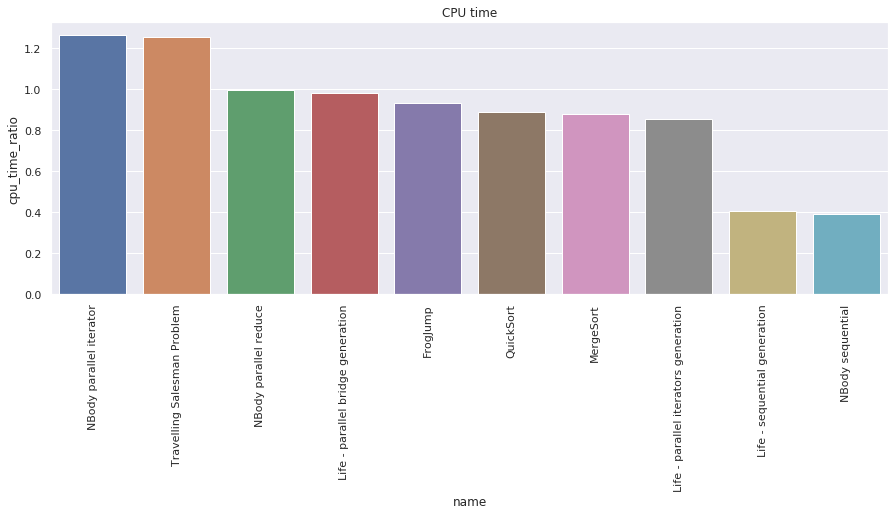

In [5]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('CPU time')
ax1.set_ylabel('Active time [us]')
ax1.set_xlabel('Algorithm')

#sns.barplot(x='name', y='cpu_time_us', hue='branch', data=df_to_plot);
sns.barplot(x='name', y='cpu_time_ratio', data=df_to_plot);
plt.xticks(rotation=90);

# x = mean(master) / mean(new_algorithm)
#     x < 1: we are losing
#     x > 1: we are winning

## Energy

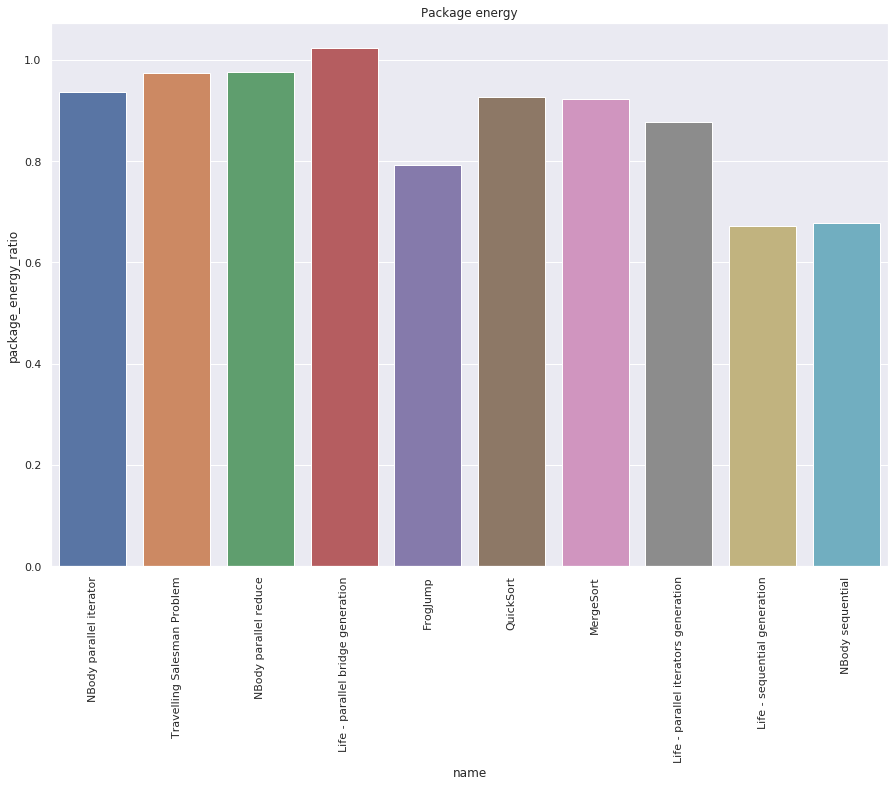

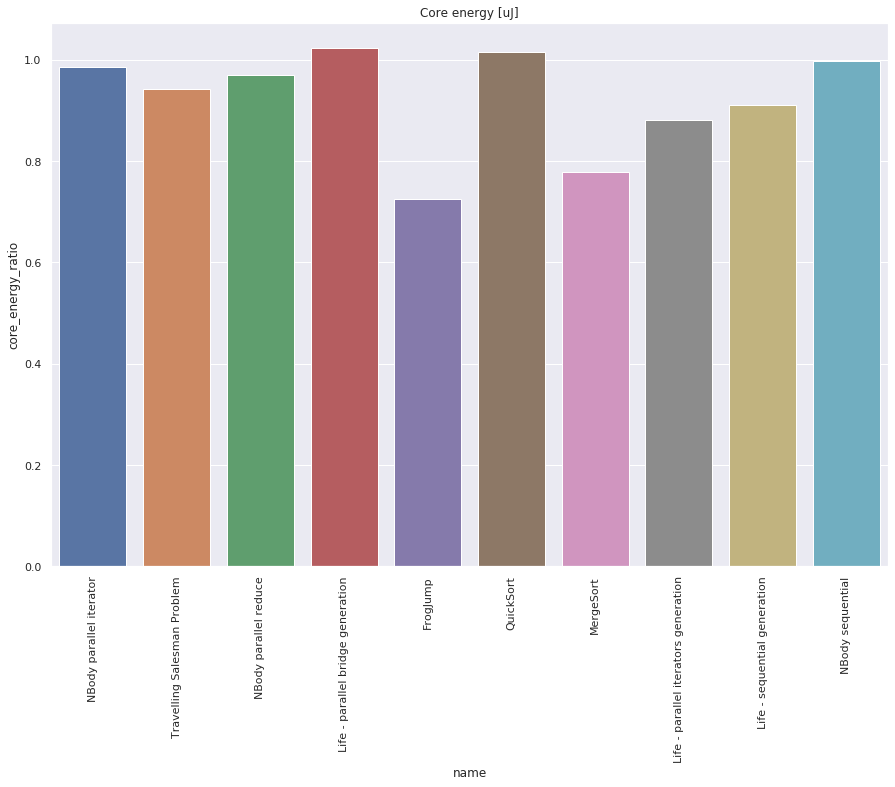

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(15, 10));

ax2.set_title('Package energy')
ax2.set_ylabel('Energy [uJ]')
ax2.set_xlabel('Sleep duration [us]')
sns.barplot(x='name', y='package_energy_ratio', data=df_to_plot);
plt.xticks(rotation=90);

fig2, ax3 = plt.subplots(1, figsize=(15, 10));

ax3.set_title('Core energy [uJ]')
ax3.set_ylabel('Energy [uJ]')
ax3.set_xlabel('Sleep duration [us]')
sns.barplot(x='name', y='core_energy_ratio', data=df_to_plot);

plt.xticks(rotation=90);

## Histogram

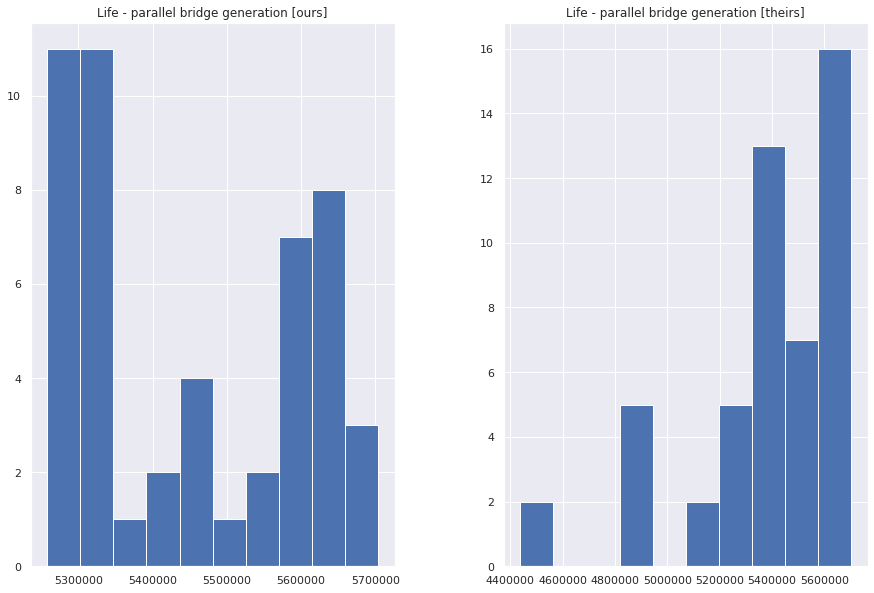

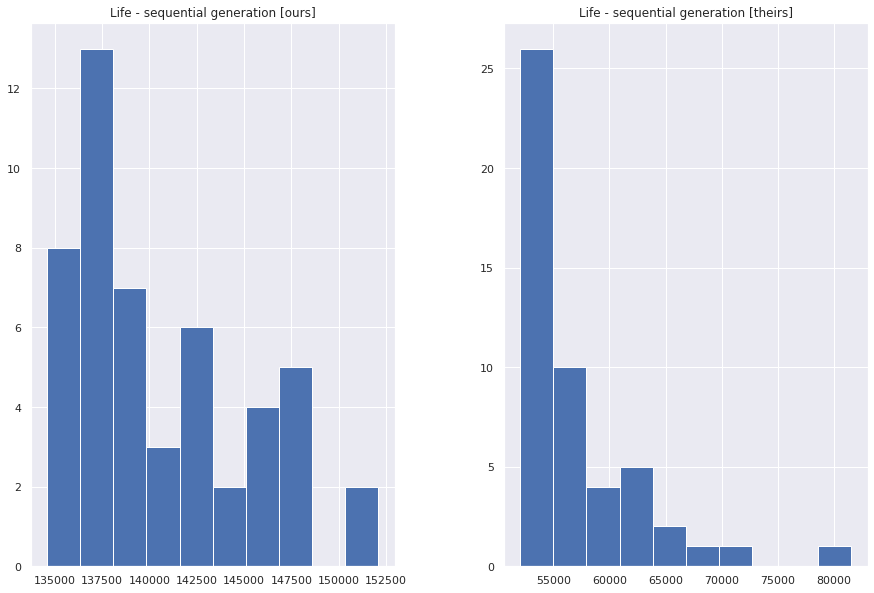

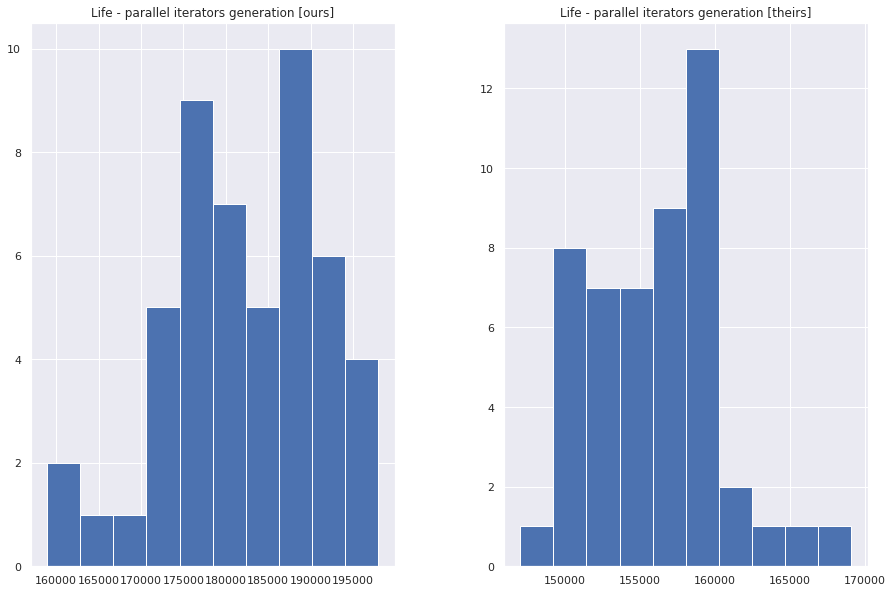

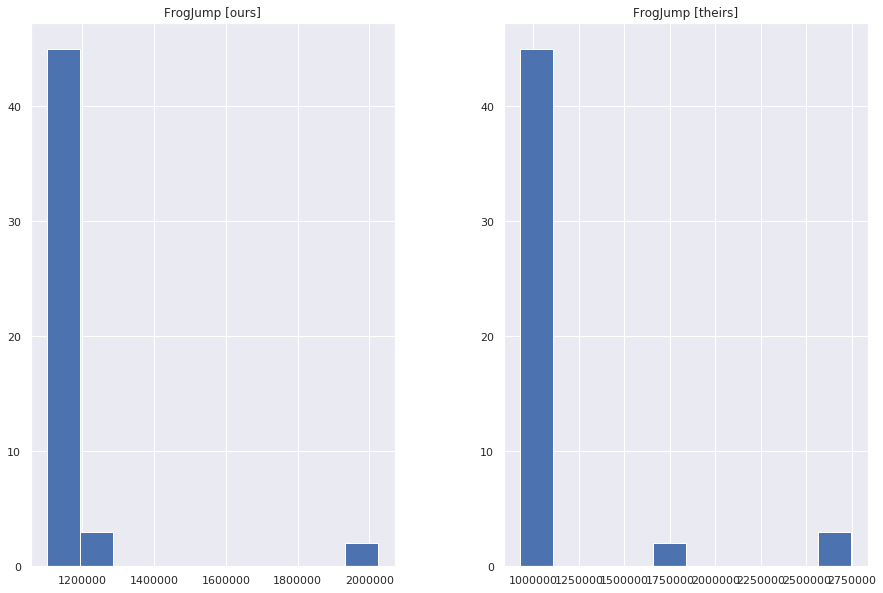

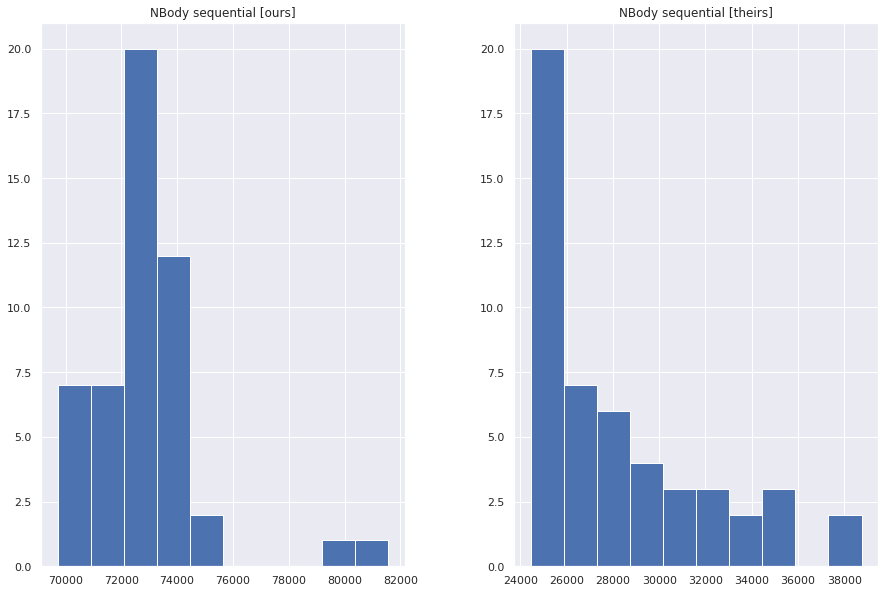

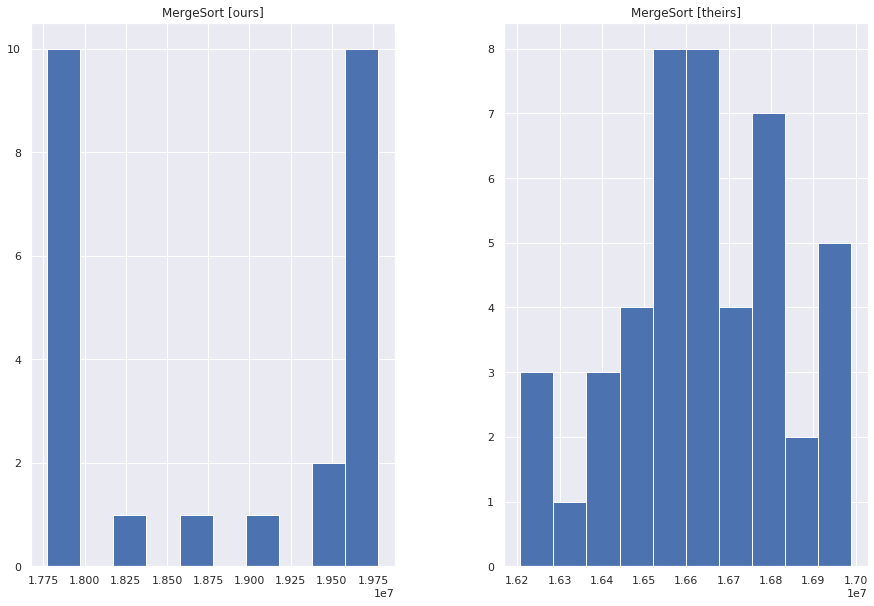

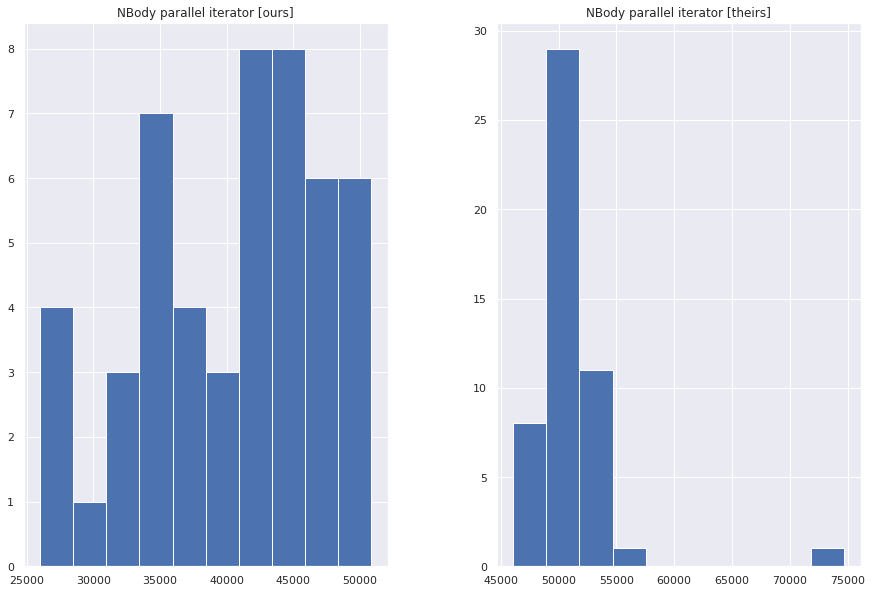

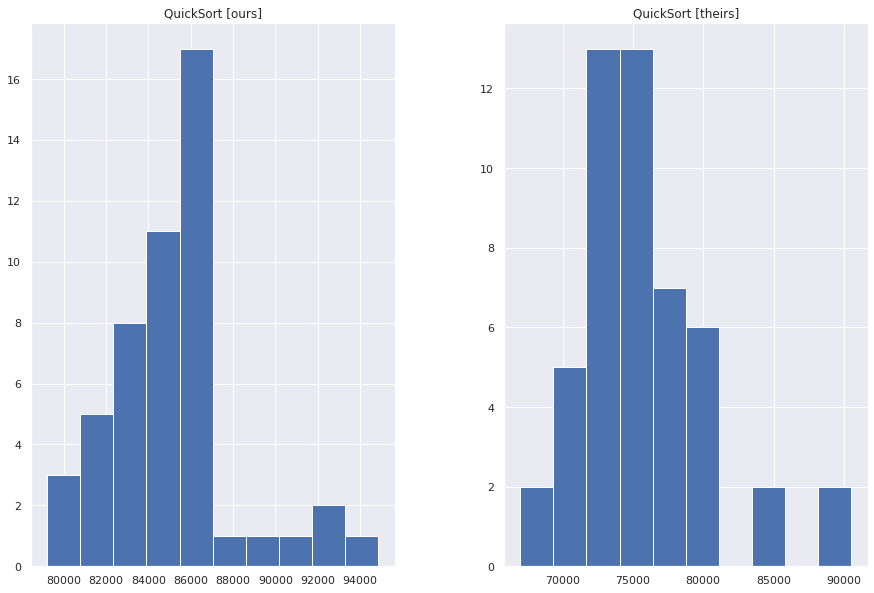

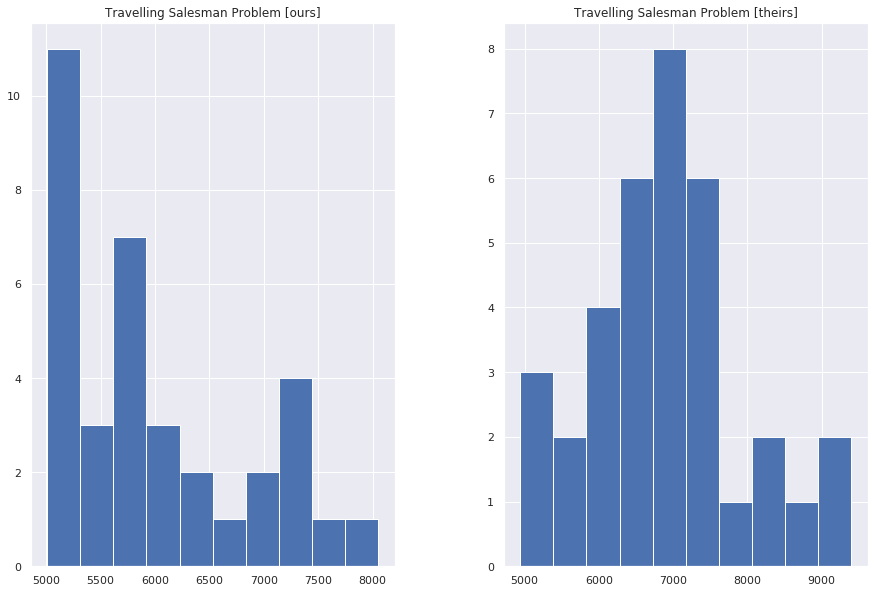

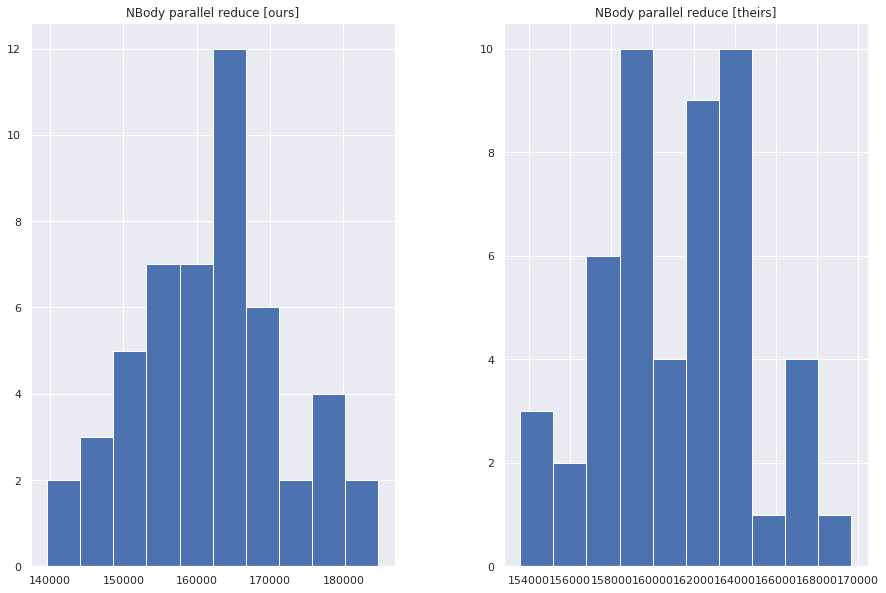

In [7]:
ours = df[df['branch'] != 'master']
theirs = df[df['branch'] == 'master']

for algorithm in set(df['name']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

    our_algorithm_df = ours[ours['name'] == algorithm]
    their_algorithm_df = theirs[theirs['name'] == algorithm]

    our_hist = our_algorithm_df.hist(bins=10, column='cpu_time_us', ax=ax1)
    their_hist = their_algorithm_df.hist(bins=10, column='cpu_time_us', ax=ax2)
    ax1.set_title(algorithm + ' [ours]')
    ax2.set_title(algorithm + ' [theirs]')